In [1]:

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pd.set_option("display.max_columns", None)    
pd.set_option("display.max_rows", None)       
pd.set_option("display.width", None)          
pd.set_option("display.max_colwidth", None)   

print("Imported all the libraries.")

You have imported all the libraries.


## Loading the Data into a Pandas DataFrame

In [2]:
df = pd.read_csv("https://www.sciencebuddies.org/ai/colab/spotify.csv?t=AQU3LzKLc0J96ODJWvw3UCZobKehi9Crkjrtlz_cLYKUjQ")
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,Gorillaz - Rhinestone Eyes [Storyboard Film] (Official Music Video),Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,Gorillaz - New Gold ft. Tame Impala & Bootie Brown (Official Visualiser),Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


## Preprocessing the Dataset

Dropping NaN Values

In [3]:
# Display the shape before dropping NaN values
print("Shape before dropping NaN values:", df.shape)

# Drop NaN values from the DataFrame
df.dropna(inplace=True)

# Display the shape after dropping NaN values
print("Shape after dropping NaN values:", df.shape)
df.head()

Shape before dropping NaN values: (20594, 24)
Shape after dropping NaN values: (20592, 24)


,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,Gorillaz - Rhinestone Eyes [Storyboard Film] (Official Music Video),Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,Gorillaz - New Gold ft. Tame Impala & Bootie Brown (Official Visualiser),Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


Dropping Features

In [10]:
# TODO: List the columns that you want to drop
columns_to_drop = ['Artist', 'Track', 'Album', 'Album_type', 'Title', 'Channel', 'Licensed', 'official_video', 'most_playedon']

# Create a new DataFrame that excludes the specified columns
dropped_df = df.drop(columns=columns_to_drop)

# Let's check if our specified columns are no longer there!
dropped_df.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
0,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,693555221.0,6220896.0,169907.0,1.040235e+09,1.150082
1,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,72011645.0,1079128.0,31003.0,3.100837e+08,15.183585
2,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,8435055.0,282142.0,7399.0,6.306347e+07,7.956897
3,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,211754952.0,1788577.0,55229.0,4.346636e+08,11.546875
4,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,618480958.0,6197318.0,155930.0,6.172597e+08,9.942693


Since KMeans is a distance-based algorithm, it is crucial to normalize or scale the features to ensure that all features contribute equally to the distance calculations.

In [11]:
# We can use the describe() function to provide a summary of statistical information about the numerical columns in the DataFrame
dropped_df.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
count,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,2.059200e+04,2.059200e+04,2.059200e+04,2.059200e+04,20592.000000
mean,0.620162,0.635238,-7.678999,0.096742,0.291419,0.056167,0.193672,0.530128,120.574326,3.742802,9.204529e+07,6.480451e+05,2.684902e+04,1.326451e+08,5.167227
std,0.165399,0.214193,4.639089,0.112183,0.286117,0.193630,0.168829,0.245499,29.565662,2.084986,2.726146e+08,1.773725e+06,1.911843e+05,2.423699e+08,4.117431
min,0.000000,0.000020,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,0.516417,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000049
25%,0.519000,0.507000,-8.868250,0.035700,0.045200,0.000000,0.094100,0.340000,96.994750,2.997546,1.478416e+06,1.754600e+04,4.060000e+02,1.558757e+07,2.386190
50%,0.638000,0.666000,-6.541000,0.050700,0.193000,0.000002,0.125000,0.538000,119.959500,3.551433,1.331348e+07,1.153155e+05,3.006000e+03,4.730244e+07,4.256881
75%,0.741000,0.798000,-4.935000,0.104000,0.477000,0.000474,0.237000,0.727000,139.924500,4.202329,6.740061e+07,5.000950e+05,1.373900e+04,1.343384e+08,6.822034
max,0.975000,1.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,77.934300,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09,59.113924


In [12]:
# TODO: Identify the numerical feature columns you want to normalize
numerical_columns = ['Loudness']

# Create a copy of the dropped_df
final_df = dropped_df

# Apply min-max scaling to the selected numerical feature columns
final_df[numerical_columns] = (dropped_df[numerical_columns] - dropped_df[numerical_columns].min()) / (dropped_df[numerical_columns].max() - dropped_df[numerical_columns].min())

# Let's see what our normalization did!
final_df.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
count,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,2.059200e+04,2.059200e+04,2.059200e+04,2.059200e+04,20592.000000
mean,0.620162,0.635238,0.817706,0.096742,0.291419,0.056167,0.193672,0.530128,120.574326,3.742802,9.204529e+07,6.480451e+05,2.684902e+04,1.326451e+08,5.167227
std,0.165399,0.214193,0.098346,0.112183,0.286117,0.193630,0.168829,0.245499,29.565662,2.084986,2.726146e+08,1.773725e+06,1.911843e+05,2.423699e+08,4.117431
min,0.000000,0.000020,0.000000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,0.516417,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000049
25%,0.519000,0.507000,0.792494,0.035700,0.045200,0.000000,0.094100,0.340000,96.994750,2.997546,1.478416e+06,1.754600e+04,4.060000e+02,1.558757e+07,2.386190
50%,0.638000,0.666000,0.841831,0.050700,0.193000,0.000002,0.125000,0.538000,119.959500,3.551433,1.331348e+07,1.153155e+05,3.006000e+03,4.730244e+07,4.256881
75%,0.741000,0.798000,0.875877,0.104000,0.477000,0.000474,0.237000,0.727000,139.924500,4.202329,6.740061e+07,5.000950e+05,1.373900e+04,1.343384e+08,6.822034
max,0.975000,1.000000,1.000000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,77.934300,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09,59.113924


## Clustering the Data

In [13]:
# Function that works out optimum number of clusters
def optimise_k_means(final_df, max_k):
    means = []
    inertias = []

    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, n_init=max_k)
        kmeans.fit(final_df)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Generate the elbow plot
    plt.figure(figsize=(10, 5))  # Create a new figure
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

print("This code block has been run and the optimise_k_means() function is now available for use.")

This code block has been run and the optimise_k_means() function is now available for use.


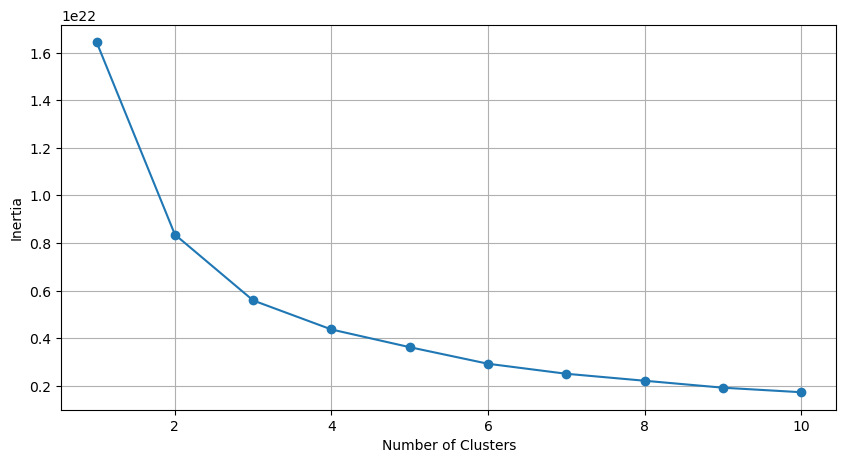

In [49]:
optimise_k_means(final_df, 10)

## Applying K-Means Clustering

In [70]:
# Number of k-cluster groups: 
kmeans = KMeans(n_clusters= 10, n_init='auto') 


kmeans.fit(final_df)

# Creating a column that states the songs cluster groups 
df['Cluster'] = kmeans.labels_
final_df['Cluster'] = kmeans.labels_


df.head(20)

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon,Cluster
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,6.935552e+08,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify,1
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,Gorillaz - Rhinestone Eyes [Storyboard Film] (Official Music Video),Gorillaz,7.201164e+07,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify,3
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,Gorillaz - New Gold ft. Tame Impala & Bootie Brown (Official Visualiser),Gorillaz,8.435055e+06,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify,0
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,2.117550e+08,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify,9
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,Gorillaz - Clint Eastwood (Official Video),Gorillaz,6.184810e+08,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube,8
5,Gorillaz,DARE,Demon Days,album,0.760,0.891,-5.852,0.0372,0.022900,0.086900,0.2980,0.966,120.264,4.083333,Gorillaz - DARE (Official Video),Gorillaz,2.590212e+08,1844658.0,72008.0,True,True,3.238503e+08,2.989933,Spotify,4
6,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) - Dom Dolla Remix,New Gold (feat. Tame Impala and Bootie Brown) [Dom Dolla Remix],single,0.716,0.897,-7.185,0.0629,0.012000,0.262000,0.3250,0.358,127.030,4.569033,"Gorillaz - New Gold ft. Tame Impala, Bootie Brown (Dom Dolla Remix) (Official Live Video)",Dom Dolla,4.519960e+05,11686.0,241.0,False,True,1.066615e+07,2.760000,Spotify,0
7,Gorillaz,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,0.726,0.815,-5.886,0.0313,0.007990,0.081000,0.1120,0.462,140.158,3.492667,Gorillaz - She's My Collar [HQ],SalvaMuñox,1.010982e+06,17675.0,260.0,False,False,1.596059e+08,7.276786,Spotify,3
8,Gorillaz,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,0.741,0.913,-3.340,0.0465,0.003430,0.103000,0.3250,0.643,120.012,3.562500,Gorillaz - Cracker Island ft. Thundercat (Official Video),Gorillaz,2.445982e+07,739527.0,20296.0,True,True,4.267190e+07,2.809231,Spotify,0
9,Gorillaz,Dirty Harry,Demon Days,album,0.625,0.877,-7.176,0.1620,0.031500,0.081100,0.6720,0.865,192.296,3.840433,Gorillaz - Dirty Harry (Official Video),Gorillaz,1.547611e+08,1386920.0,39240.0,True,True,1.910747e+08,1.305060,Spotify,3


## Visualize the Model

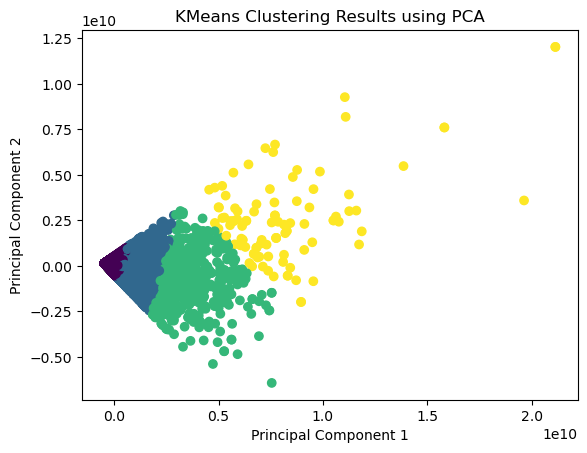

In [66]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(final_df.drop('Cluster', axis=1)) # Exclude the cluster labels

# Add the reduced components to the DataFrame
final_df['pca_1'] = reduced_features[:, 0]
final_df['pca_2'] = reduced_features[:, 1]

# Create a scatter plot
plt.scatter(final_df['pca_1'], final_df['pca_2'], c=final_df['Cluster'], cmap='viridis')
plt.title('KMeans Clustering Results using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Creating Our Song Recommendation Function

In [67]:
# This function attemps to find the index of a given track name in the 'Track' column of the dataframe
def find_track_index(track_name, df):
    try:
        # Attempt to find the index of the first occurence of 'track_name' in the 'Track' column of 'df'
        track_index = df[df['Track'] == track_name].index[0]
        # Return the index if found
        return track_index
    except IndexError:
        # If the track name is not found, return None
        return None

In [71]:
# This function finds song recommendations based on a given track name and the DataFrame 'df'
def find_song_recommendation(track_name, df):
    # Call the 'find_track_index' function to get the index of the provided 'track_name'
    track_index = find_track_index(track_name, df)

    # Retrieve the cluster label of the provided track using its index
    cluster = df.loc[track_index]['Cluster']

    # Create a filter to select rows in 'df' that belong to the same cluster as the provided track
    filter = (df['Cluster'] == cluster)

    # Apply the filter to 'df' to get a DataFrame containing songs from the same cluster
    filtered_df = df[filter]

    # Generate song recommendations by randomly selecting tracks from the same cluster
    for i in range(5):
        # Randomly sample a track from the shuffled DataFrame
        recommendation = filtered_df.sample()
        # Print the recommended track's title and artist
        print(recommendation.iloc[0]['Track'] + ' by ' + recommendation.iloc[0]['Artist'])

In [73]:
# TODO: Experiment with inputting different song names!
find_song_recommendation("Can't Stop", df)

In the Name of Love by Bebe Rexha
Lalala by bbno$
High Hopes by Panic! At The Disco
Centuries by Fall Out Boy
Adore You by Harry Styles


## Creating Our Song Randomizer Function

In [57]:
def find_random_song(track_name, df):
    # Call the 'find_track_index' function to get the index of the provided 'track_name'
    track_index = find_track_index(track_name, df)

    # Retrieve the cluster label of the provided track using its index
    cluster = df.loc[track_index]['Cluster']

    # Create a filter to select rows in 'df' that don't belong to the same cluster as the provided track
    filter = (df['Cluster'] != cluster)

    # Apply the filter to 'df' to get a DataFrame containing songs from different clusters
    filtered_df = df[filter]

    # Generate song recommendations by randomly selecting tracks from the filtered dataframe
    for i in range(5):
        # Randomly sample a track from the shuffled DataFrame
        random_song = filtered_df.sample()
        # Print the random song track's title and artist
        print(random_song.iloc[0]['Track'] + ' by ' + random_song.iloc[0]['Artist'])

In [58]:
# TODO: Experiment with inputting different song names!
find_random_song('Dark Necessities', df)

Peaches (feat. Daniel Caesar & Giveon) by Giveon
YES by Fat Joe
A Que No Te Atreves by Tito "El Bambino"
Mátenme Porque Me Muero by Caifanes
Daaru Desi (From "Cocktail") by Benny Dayal


## Evaluating the Model

In [24]:
# TODO: Insert the accuracies for each of the functions
recommendations_accuracy = [90]
random_songs_accuracy = [5]

recommendations_average = sum(recommendations_accuracy) / len(recommendations_accuracy)
random_songs_average = sum(random_songs_accuracy) / len(random_songs_accuracy)

print("Recommendations average accuracy:", recommendations_average)
print("Random songs average accuracy:", random_songs_average)

Recommendations average accuracy: 90.0
Random songs average accuracy: 5.0
